# 4.8 Task 

## Import Libraries

In [20]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import Data

In [4]:
# Set path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 4/01-2025 Instacart Basket Analysis'

In [6]:
# import data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'ords_prods_merge_dervd.pkl'))

In [67]:
ords_prods_merge.head(20)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days,busiest_perdiod_of_day
30885513,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days,Fewest orders
10811325,2754998,68576,6,0,8,7.0,25773,16,1,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Busiest day,Two busiest Days,Average orders
26539914,3086607,168921,27,2,20,0.0,25773,2,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days,Average orders
13922765,429310,88247,2,4,10,8.0,25773,12,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,least busy,Two slowest Days,Most orders
2470107,1836950,15906,2,3,14,12.0,25773,7,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Two slowest Days,Most orders
22230852,1750178,141333,34,5,11,2.0,25773,2,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders
3373664,3337190,21656,7,0,11,22.0,25773,2,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Busiest day,Two busiest Days,Most orders
27938906,1378542,177712,39,5,16,13.0,25773,16,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders
29391981,3168959,186848,8,4,18,8.0,25773,9,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,least busy,Two slowest Days,Average orders
27938907,1540175,177712,40,5,16,0.0,25773,1,1,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders


### Task 02. In this Exercise, you learned how to find the aggregated mean of the “order_number” column grouped by “department_id” for a subset of your dataframe. Now, repeat this process for the entire dataframe

In [8]:
ords_prods_merge.groupby('department_id')['order_number'].mean()

department_id
1     15.457838
2     17.277920
3     17.170395
4     17.811403
5     15.215751
6     16.439806
7     17.225802
8     15.340650
9     15.895474
10    20.197148
11    16.170638
12    15.887671
13    16.583536
14    16.773669
15    16.165037
16    17.665606
17    15.694469
18    19.310397
19    17.177343
20    16.473447
21    22.902379
Name: order_number, dtype: float64

##### The subet dataframe has a higher average of order number compared to the whole dataframe but there aren't any extreme differences.  

#### Q4. Follow the instructions in the Exercise for creating a loyalty flag for existing customers using the transform() and loc() functions.

In [10]:
#Aggregating Data with transform(). creating new column 'max_order'
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_67336/882163782.py:2: FutureWarning: The provided callable <function max at 0x121506480> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [12]:
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [14]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [16]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [104]:
# Examining Value Counts on 'loyalty_flag'
df_loyalty = ords_prods_merge['loyalty_flag'].value_counts(dropna = False)
df_loyalty

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

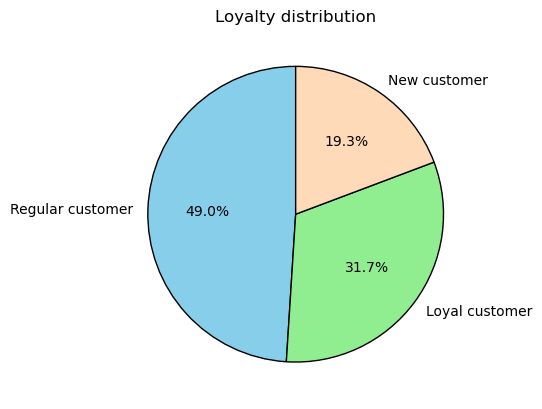

In [114]:
df_pie = df_loyalty.plot.pie(autopct='%1.1f%%', labels=['Regular customer', 'Loyal customer', 'New customer'], startangle=90, colors=['skyblue','lightgreen', 'peachpuff'], wedgeprops={'edgecolor':'black'})
plt.ylabel('')  # Hide the y-label
plt.title('Loyalty distribution')
plt.show()

In [84]:
# checking updated dataframe 
ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(5)

,user_id,loyalty_flag,order_number
30885513,196356,Loyal customer,14
10811325,68576,Regular customer,6
26539914,168921,Loyal customer,27
13922765,88247,Regular customer,2
2470107,15906,Regular customer,2


#### Q5. Analyzing spending habits of identifed customers

In [87]:
#Aggregating Data with transform()
ords_prods_merge.groupby(['loyalty_flag']).agg({'prices': ['min', 'max', 'mean']})

prices                    
                    min      max       mean
loyalty_flag                               
Loyal customer      1.0  99999.0  10.386336
New customer        1.0  99999.0  13.294670
Regular customer    1.0  99999.0  12.495717

##### Loyal customers on average purchase lower priced items compared to new and regular customers

#### Q6. Create a spending flag for each user based on the average price across all their orders 

In [91]:
#Aggregating Data with transform(). creating new column 'average_price'
ords_prods_merge['avg_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform("mean")

In [93]:
ords_prods_merge[['user_id', 'loyalty_flag', 'prices', 'avg_price']].head(5)

,user_id,loyalty_flag,prices,avg_price
30885513,196356,Loyal customer,11.0,6.699582
10811325,68576,Regular customer,11.0,8.010630
26539914,168921,Loyal customer,11.0,8.281250
13922765,88247,Regular customer,11.0,7.431573
2470107,15906,Regular customer,11.0,8.208757


In [95]:
#If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
ords_prods_merge.loc[ords_prods_merge['avg_price'] < 10, 'spending_flag'] = 'Low spender'

In [96]:
#If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”
ords_prods_merge.loc[ords_prods_merge['avg_price'] >= 10, 'spending_flag'] = 'High spender'

In [99]:
# Examining Value Counts on 'Spending_flag'
ords_prods_merge['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [101]:
# Checking Releavent Columns
ords_prods_merge.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,match,price_range_loc,busiest_day,busiest_days,busiest_perdiod_of_day,max_order,loyalty_flag,avg_price,spending_flag
30885513,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Fewest orders,60,Loyal customer,6.699582,Low spender
10811325,2754998,68576,6,0,8,7.0,25773,16,1,#2 Coffee Filters,...,11.0,both,Mid-range product,Busiest day,Two busiest Days,Average orders,11,Regular customer,8.010630,Low spender
26539914,3086607,168921,27,2,20,0.0,25773,2,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Average orders,82,Loyal customer,8.281250,Low spender
13922765,429310,88247,2,4,10,8.0,25773,12,0,#2 Coffee Filters,...,11.0,both,Mid-range product,least busy,Two slowest Days,Most orders,22,Regular customer,7.431573,Low spender
2470107,1836950,15906,2,3,14,12.0,25773,7,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Two slowest Days,Most orders,24,Regular customer,8.208757,Low spender
22230852,1750178,141333,34,5,11,2.0,25773,2,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders,58,Loyal customer,8.394872,Low spender
3373664,3337190,21656,7,0,11,22.0,25773,2,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Busiest day,Two busiest Days,Most orders,13,Regular customer,6.925862,Low spender
27938906,1378542,177712,39,5,16,13.0,25773,16,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders,41,Loyal customer,7.646278,Low spender
29391981,3168959,186848,8,4,18,8.0,25773,9,0,#2 Coffee Filters,...,11.0,both,Mid-range product,least busy,Two slowest Days,Average orders,10,New customer,7.938272,Low spender
27938907,1540175,177712,40,5,16,0.0,25773,1,1,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Most orders,41,Loyal customer,7.646278,Low spender


#### Q7. Create an order frequency flag that marks the regularity of a user’s ordering behavior¶

In [104]:
ords_prods_merge.head(1)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,match,price_range_loc,busiest_day,busiest_days,busiest_perdiod_of_day,max_order,loyalty_flag,avg_price,spending_flag
30885513,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,...,11.0,both,Mid-range product,Regular busy,Regular Days,Fewest orders,60,Loyal customer,6.699582,Low spender


In [76]:
ords_prods_merge['days_since_prior_order'] = ords_prods_merge['days_since_prior_order'].fillna(0).astype(int)

In [78]:
#Aggregating Data with transform(). creating new column 'median_days_order'
ords_prods_merge['median_days_order'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform("median")

In [107]:
#checking column created
ords_prods_merge[['user_id', 'median_days_order']].head(1)

,user_id,median_days_order
30885513,196356,7.0


In [28]:
#If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
ords_prods_merge.loc[ords_prods_merge['median_days_order'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [30]:
#If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
ords_prods_merge.loc[(ords_prods_merge['median_days_order'] > 10) &(ords_prods_merge['median_days_order'] <= 20) , 'frequency_flag'] = 'Regular customer'

In [32]:
#If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”
ords_prods_merge.loc[ords_prods_merge['median_days_order'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [36]:
# Examining Value Counts on 'Spending_flag'
ords_prods_merge['frequency_flag'].value_counts(dropna = True)

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Name: count, dtype: int64

In [94]:
ff_dl = pd.crosstab(ords_prods_merge['days_since_prior_order'], ords_prods_merge['loyalty_flag'], dropna = True)
ff_dl 

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0,428361,1143134,952930
1,626159,52138,262177
2,973214,73018,417492
3,1185968,102510,587710
4,1202971,128621,747056
5,1074717,163020,886697
6,1090986,230094,1196418
7,1351314,349823,1775061
8,643383,223448,1065114


(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000., 3500000., 4000000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5'),
  Text(0, 3000000.0, '3.0'),
  Text(0, 3500000.0, '3.5'),
  Text(0, 4000000.0, '4.0')])

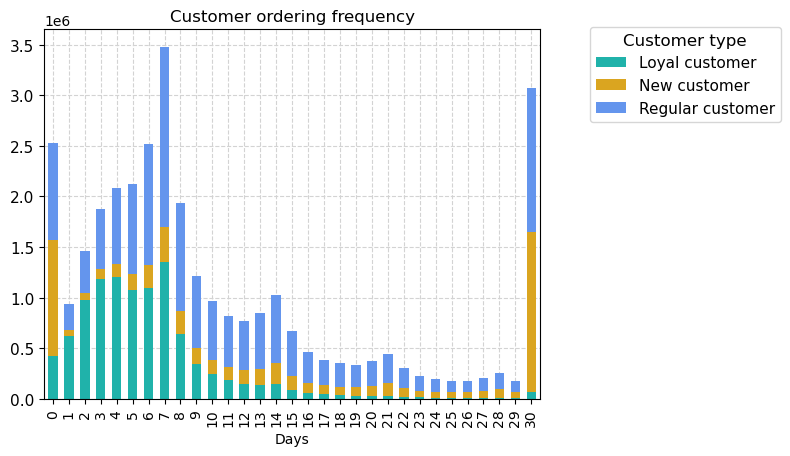

In [96]:
# plot bar chart
colors = ['lightseagreen','goldenrod','cornflowerblue','lightcoral','yellowgreen','peachpuff']
ff_dl_bar = ff_dl.plot.bar(color=colors,stacked =True, width = 0.6)

# Adjust legend
leg = plt.legend(loc=(1.1,0.75),title='Customer type', title_fontsize=12, fontsize=11)
for text in leg.get_texts():
    text.set_color('black')
    
    
plt.gca().set_axisbelow(True) 
plt.grid(axis='both', color='lightgray', linestyle='dashed')
 
plt.title('Customer ordering frequency')
plt.ylabel('',weight='black')
plt.xlabel('Days')

plt.yticks(fontsize=11)


In [97]:
ords_prods_merge[['user_id', 'median_days_order','frequency_flag']].head(60)

,user_id,median_days_order,frequency_flag
30885513,196356,7.0,Frequent customer
10811325,68576,7.0,Frequent customer
26539914,168921,4.0,Frequent customer
13922765,88247,8.0,Frequent customer
2470107,15906,12.0,Regular customer
22230852,141333,4.0,Frequent customer
3373664,21656,5.0,Frequent customer
27938906,177712,8.0,Frequent customer
29391981,186848,25.0,Non-frequent customer
27938907,177712,8.0,Frequent customer


In [120]:
# Export your dataframe as a pickle file and store it correctly in your “Prepared Data” folder.
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived_grouped.pkl'))

In [202]:
ords_prods_merge.shape

(32404859, 23)